Python code to generate the plots from the matlab experiments.

In [1]:
import scipy.io as spio
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
pwd

'/Users/cdickens/Desktop/high-leverage-rows/figures'

In [3]:

mat_identity = spio.loadmat('../scripts/household/regression/household_identity.mat', squeeze_me=True)
mat_orth = spio.loadmat('../scripts/household/regression/household_orth.mat', squeeze_me=True)
mat_spc3 = spio.loadmat('../scripts/household/regression/household_condition_spc3.mat', squeeze_me=True)
mat_uniform = spio.loadmat('../scripts/household/regression/household_uniform_sampling.mat', squeeze_me=True)


In [4]:
mat_identity

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jan 31 12:33:22 2018',
 '__version__': '1.0',
 'approx_regression_time': array([  1.57314200e-03,   1.25236000e-04,   6.21940000e-05,
          8.82510000e-05,   5.15820000e-05,   4.32320000e-05,
          1.55382631e-01,   4.96120000e-05,   4.52120000e-05,
          5.20690000e-05]),
 'block_sizes': array([ 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000], dtype=uint16),
 'error': array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  15.07865678,   0.        ,
          0.        ,   0.        ]),
 'number_of_samples': 2000000,
 'storage': array([   0,    0,    0,    0,    0,    0, 5000,    0,    0,    0], dtype=uint16),
 'threshold': 0.00012,
 'total_time': array([  1.59308600e-03,   1.27586000e-04,   6.45170000e-05,
          9.08660000e-05,   5.40700000e-05,   4.53430000e-05,
          1.55385732e-01,   5.18650000e-05,   4.767

In [5]:
import numpy as np
mins = [np.min(mat_orth['error']), np.min(mat_spc3['error']),
           np.min(mat_uniform['error'])]

min_val = np.min(mins)
max_val = np.max([np.max(mat_orth['error']), np.max(mat_spc3['error']),
           np.max(mat_uniform['error'])] )
np.arange(min_val, max_val, 0.1)

array([ 15.48638173,  15.58638173,  15.68638173,  15.78638173])

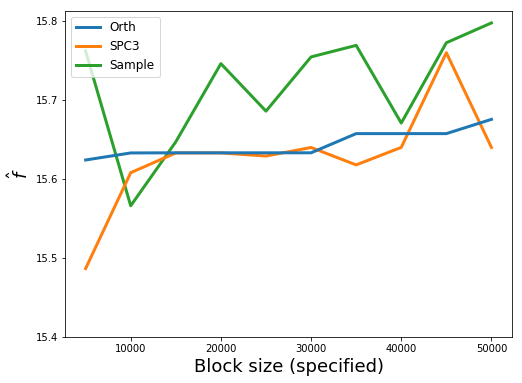

In [6]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['error'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['block_sizes'], mat_identity['error'], label = 'Identity', linewidth=3.0, zorder=2)


#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('$\hat{f}$', fontsize=18)
ax.set_xlabel('Block size (specified)', fontsize=18)
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=2, fancybox=True, fontsize=12)
ax.set_yticks(np.arange(15.4, 15.8, 0.1))


fig.savefig('household_error_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

Identity method removed as consistently outputting empty blocks and hence $\hat{f}=0$.  The value $\hat{f}$ is the approximation of the LP from the summary.

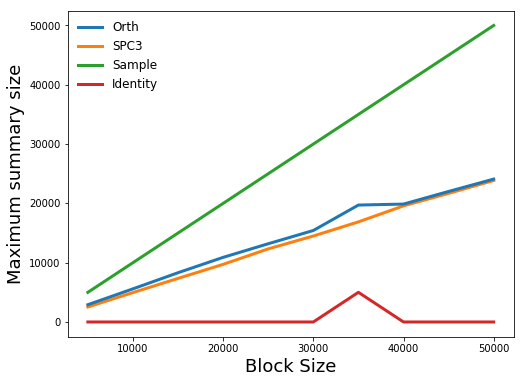

In [7]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['storage'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['storage'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['block_sizes'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['storage'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Maximum summary size', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Max rows stored (in stream) vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('household_space_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

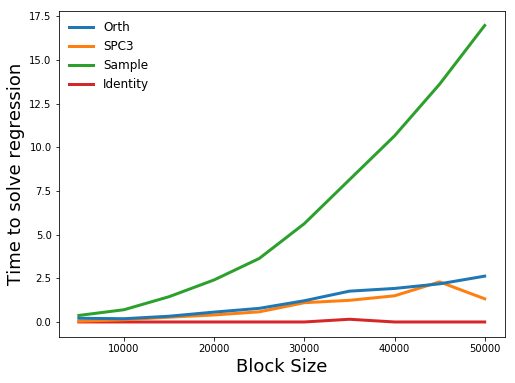

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['approx_regression_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['approx_regression_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['approx_regression_time'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time to solve regression', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to solve regression vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('household_regression_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

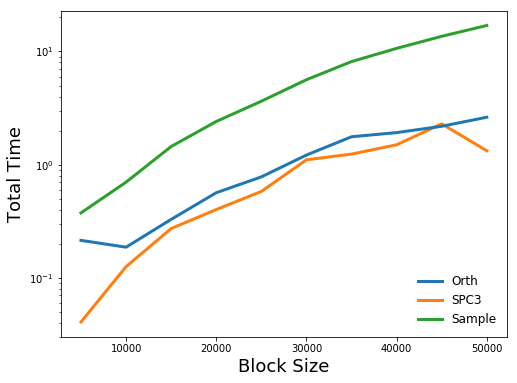

In [9]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['total_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['total_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['block_sizes'], mat_identity['total_time'], label = 'Identity',linewidth=3.0)
#ax.plot(mat_spc3['block_sizes'], mat_spc3['full_regression_time'], color='black', label = 'Brute Force',linewidth=3.0)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Total Time', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Total Time  vs Block Size")
ax.legend(loc=4, frameon=False, fontsize=12)

fig.savefig('household_total_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

### Basis times

In [10]:
basis_orth = spio.loadmat('../scripts/household/basis_times/household_condition_spc3_basis_times.mat', squeeze_me=True)
basis_spc3 = spio.loadmat('../scripts/household/basis_times/household_orth_basis_times.mat', squeeze_me=True)


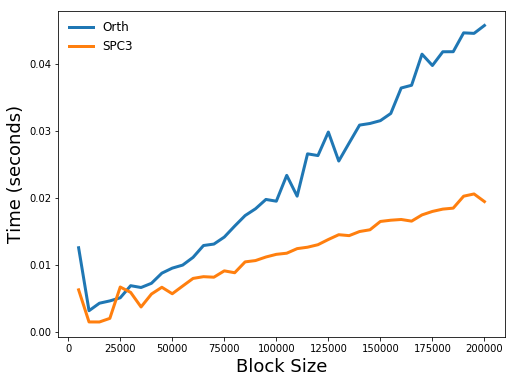

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( basis_orth['block_sizes'], basis_orth['time_for_basis'], label = 'Orth' , linewidth=3.0)
ax.plot( basis_spc3['block_sizes'], basis_spc3['time_for_basis'], label = 'SPC3', linewidth=3.0)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to compute basis  vs Block size", fontsize=18)
ax.legend(loc=0, frameon=False, fontsize=12)


fig.savefig('household_basis_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)